In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline

In [16]:
wine_data = pd.read_csv("datasets/wine/wine_train.csv")
wine = wine_data.drop("Cultivator", axis=1) # drop labels for training set
wine_targets = wine_data["Cultivator"].copy()
wine.head()

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
2,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
3,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
4,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650


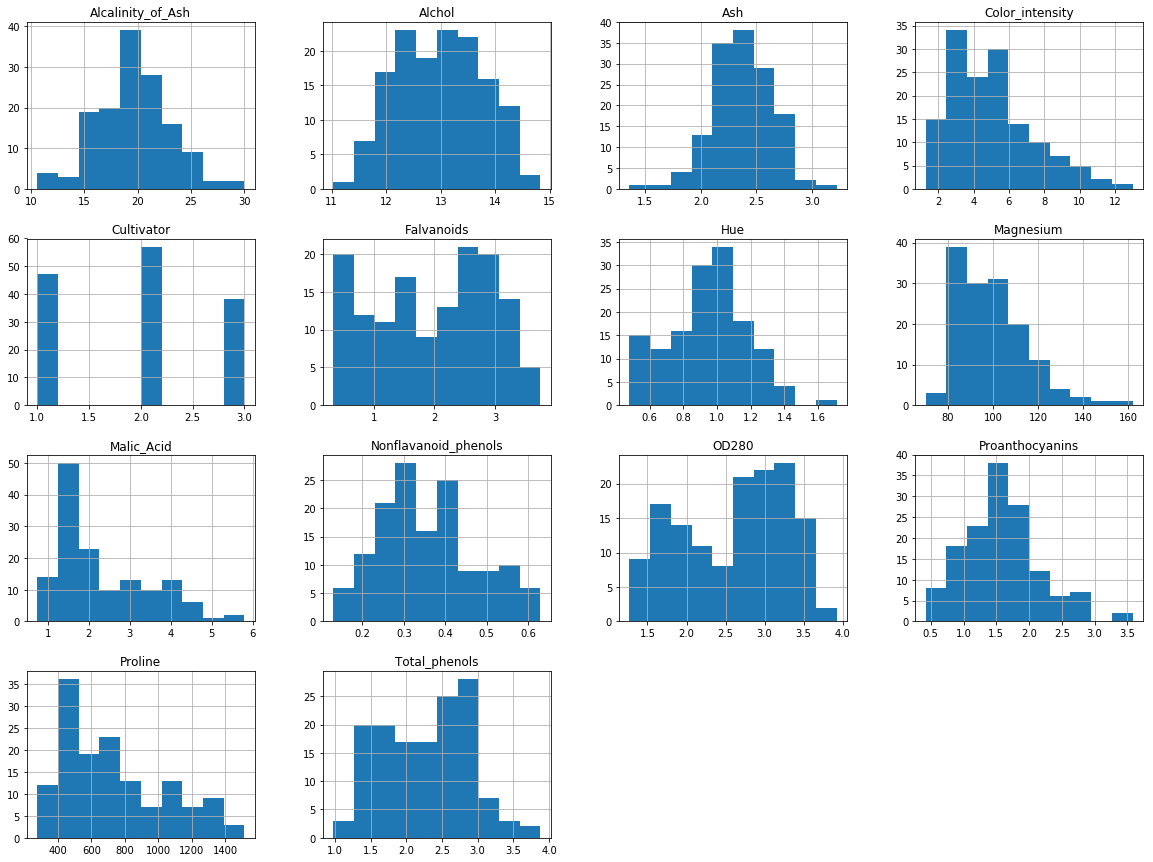

In [17]:
wine_data.hist(bins=10, figsize=(20,15))
plt.show()

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

wine_num = wine_data.head().drop('Cultivator', axis=1)
num_attribs = list(wine_num)
pprint(num_attribs)
cat_attribs = ["Cultivator"]

# Replace any missing values with the median value
# Nomalize all the data
# This is all done on the numeric data so:
# housing_num = housing.drop('ocean_proximity', axis=1)
# num_attribs = list(housing_num)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('nomalize', MinMaxScaler()),
    ])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(categories='auto'), cat_attribs),
    ])

['Alchol',
 'Malic_Acid',
 'Ash',
 'Alcalinity_of_Ash',
 'Magnesium',
 'Total_phenols',
 'Falvanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280',
 'Proline']


In [19]:
wine_prepared = full_pipeline.fit_transform(wine_data)

In [20]:
wine_prepared[0]

array([0.59210526, 0.17786561, 0.79569892, 0.25257732, 0.43478261,
       0.55862069, 0.68823529, 0.42      , 0.29746835, 0.28327645,
       0.49593496, 0.56981132, 0.48666128, 1.        , 0.        ,
       0.        ])

In [21]:
np.savetxt("datasets/wine/wine_train_array.csv", wine_prepared, delimiter=",")

In [13]:
np.savetxt("datasets/housing/wine_train_target_array.csv", wine_targets, delimiter=",")

In [18]:
print(num_attribs)

with open("datasets/wine/wine_atribute_lable_list.csv", 'w') as file_handler:
    for item in num_attribs:
        file_handler.write("{},".format(item))    

['Alchol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium', 'Total_phenols', 'Falvanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline']
